In [8]:
#根据百度百科，成交价格日线图‌是以日为单位展示股票或其他金融资产价格走势的图表，记录了每个交易日的开盘价、收盘价、最高价和最低价等关键价格信息。
#故本次作业将open,close,high,low四列关键信息提取出来作为纵轴信息，以时间为横轴，绘制折线图进行可视化

#首先调用需要的库
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# 读取数据
df = pd.read_csv('Ch3-StockTrading.csv')

In [10]:
# 转换日期列为datetime类型，确保时间轴正确
df['date'] = pd.to_datetime(df['date'])

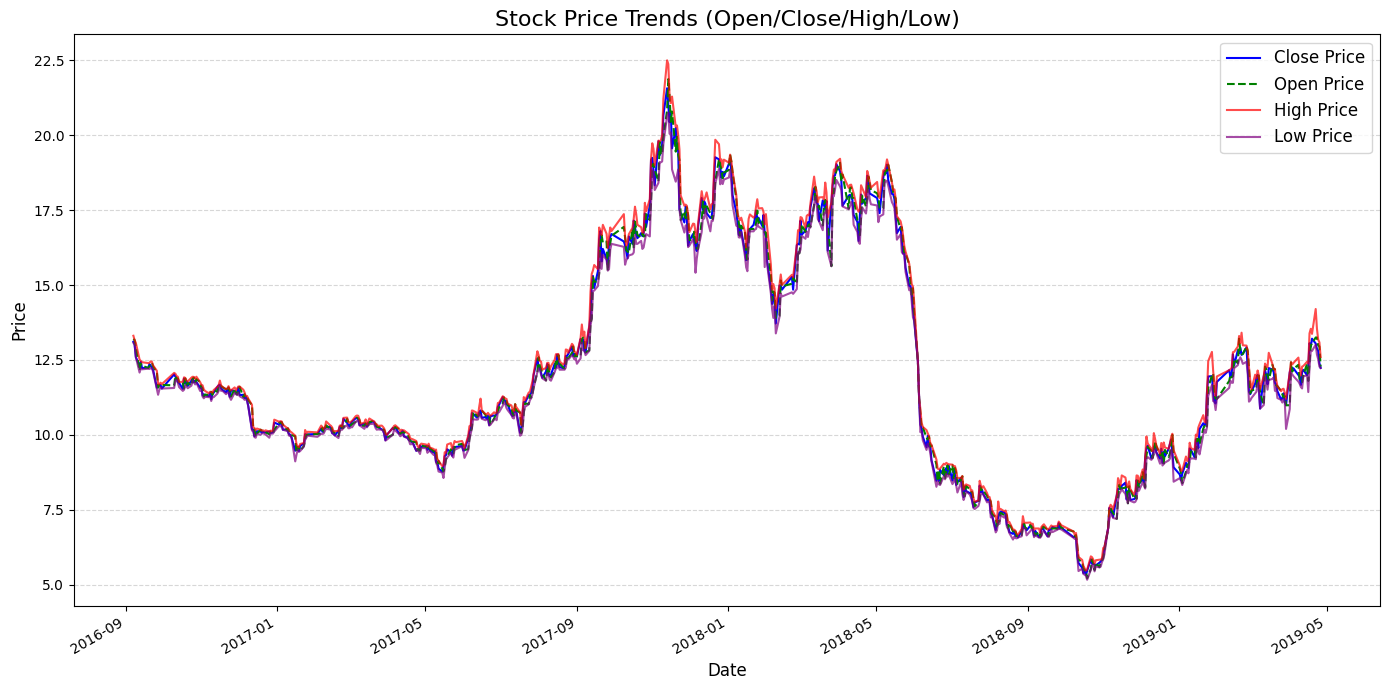

In [11]:
#绘制四条折线图
plt.figure(figsize=(14, 7))  # 设置画布大小
# 分别绘制四条线，设置不同标签、颜色、线条格式
plt.plot(df['date'], df['close'], label='Close Price', color='blue', linewidth=1.5)
plt.plot(df['date'], df['open'], label='Open Price', color='green', linewidth=1.5, linestyle='--')
plt.plot(df['date'], df['high'], label='High Price', color='red', linewidth=1.5, alpha=0.7)
plt.plot(df['date'], df['low'], label='Low Price', color='purple', linewidth=1.5, alpha=0.7)
#添加图表注释信息
plt.title('Stock Price Trends (Open/Close/High/Low)', fontsize=16)#设置图表标题
#设置x、y轴注释
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=12)  # 显示图例
plt.grid(axis='y', linestyle='--', alpha=0.5)  # 显示横向网格线
plt.gcf().autofmt_xdate() #自动调整日期显示（避免重叠）
#显示图表
plt.tight_layout()  # 防止标签被截断
plt.show()

In [27]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


C:\Users\gaoyang\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


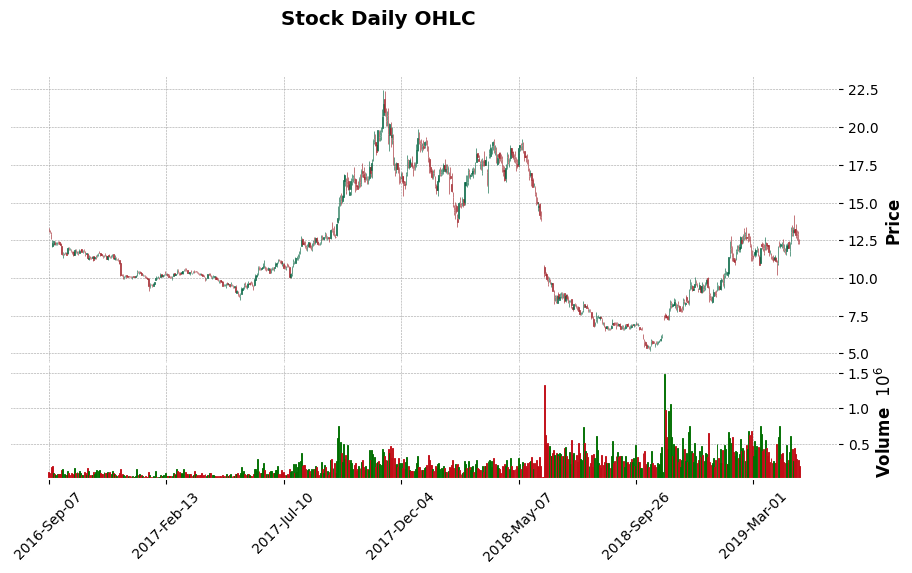

In [6]:
#请ai帮忙绘制了蜡烛图
import pandas as pd
import mplfinance as mpf

# 1. 读取数据并处理
df = pd.read_csv('Ch3-StockTrading.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 2. 选择OHLC列（开盘、最高、最低、收盘）和成交量
ohlc_data = df[['open', 'high', 'low', 'close', 'volume']]

# 3. 绘制蜡烛图
mpf.plot(ohlc_data, type='candle', style='charles',
         title='Stock Daily OHLC',
         ylabel='Price',
         volume=True,  # 显示成交量
         figratio=(12, 6))

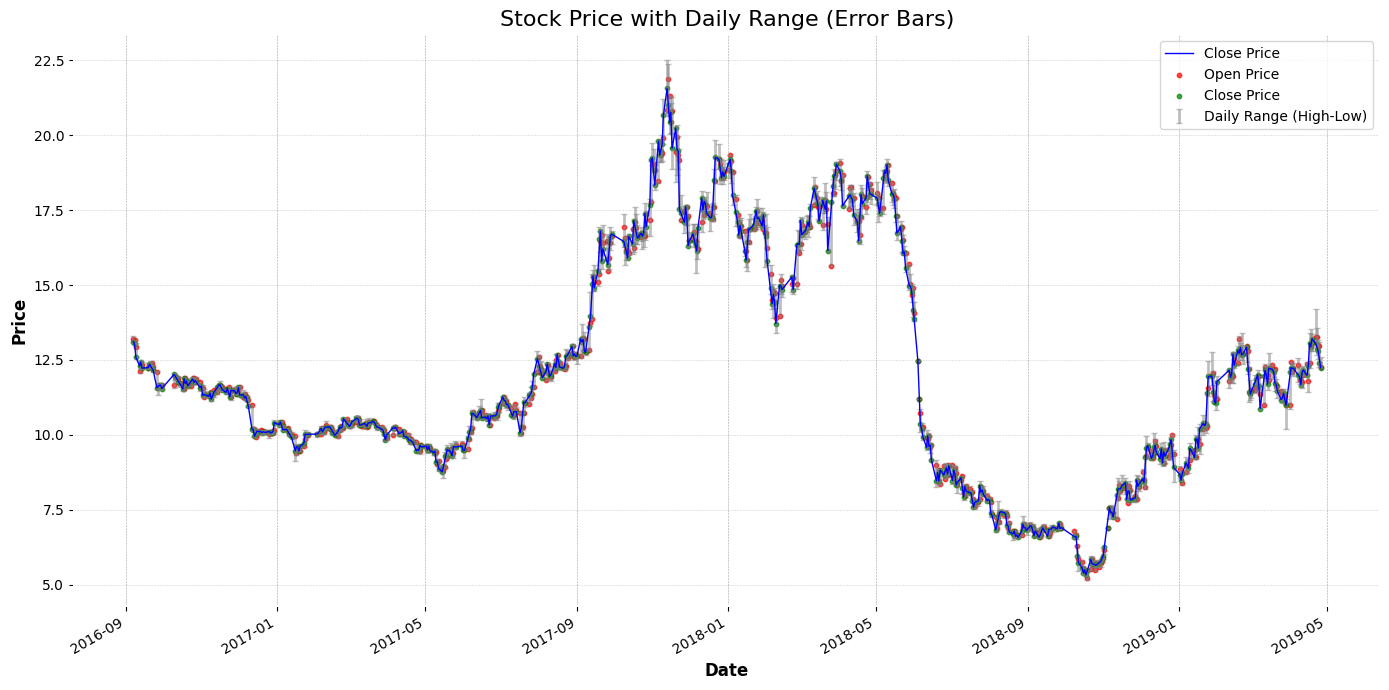

In [5]:
#参考助教建议，让ai绘制了误差棒形式
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取数据
df = pd.read_csv('Ch3-StockTrading.csv')

# 2. 转换日期列
df['date'] = pd.to_datetime(df['date'])

# 3. 计算误差范围（high - low）
y_err = df['high'] - df['low']

# 4. 创建画布
plt.figure(figsize=(14, 7))

# 5. 绘制误差棒（表示每日波动范围）
plt.errorbar(
    df['date'], 
    df['close'],  # 以收盘价为中心
    yerr=[df['close'] - df['low'], df['high'] - df['close']],  # 上下误差范围
    fmt='none',  # 不显示连接线
    ecolor='gray',  # 误差棒颜色
    alpha=0.5,  # 透明度
    capsize=2,  # 误差棒端帽大小
    label='Daily Range (High-Low)'
)

# 6. 绘制收盘价折线（趋势）
plt.plot(df['date'], df['close'], color='blue', label='Close Price', linewidth=1)

# 7. 用散点标记开盘价和收盘价
plt.scatter(df['date'], df['open'], color='red', s=10, label='Open Price', alpha=0.7)
plt.scatter(df['date'], df['close'], color='green', s=10, label='Close Price', alpha=0.7)

# 8. 添加图表装饰
plt.title('Stock Price with Daily Range (Error Bars)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 9. 自动调整日期显示
plt.gcf().autofmt_xdate()

# 10. 显示图表
plt.tight_layout()
plt.show()